<a href="https://colab.research.google.com/github/muscak/MIT-PE-Applied-Data-Science-Program/blob/master/Street%20View%20Housing%20Number%20Digit%20Recognition/SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
[Kaggel Link](https://www.kaggle.com/datasets/sasha18/street-view-house-nos-h5-file/data)

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
# Regular EDA (exploratory data analysis) and plotting libraries
import h5py  # to read the h5 files
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % 2) # Set the format of float numbers to displays only 2 digits after the point.
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
import random # to set random seed

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import backend # to clear the session

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

# Importing all the different optimizers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Importing libraries for evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.13.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

We need [h5py](https://www.h5py.org/) library to load the data to the runtime.

In [ ]:
# Set the path of the data
path = '/content/drive/MyDrive/Colab Notebooks/Applied Data Science/Elective Project/'

# read the data
images = h5py.File(path + 'SVHN_single_grey1.h5','r+')
images.keys

<bound method MappingHDF5.keys of <HDF5 file "SVHN_single_grey1.h5" (mode r+)>>

In [ ]:
# List the key value paris
for key, val in images.items():
  print(f'{key}: {val}')

X_test: <HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">
X_train: <HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">
X_val: <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">
y_test: <HDF5 dataset "y_test": shape (18000,), type "|u1">
y_train: <HDF5 dataset "y_train": shape (42000,), type "|u1">
y_val: <HDF5 dataset "y_val": shape (60000,), type "|u1">


Check the number of images in the training and the testing dataset.

In [ ]:
# Split the dataset into train and test sets
x_train = images['X_train'][:]
y_train = images['y_train'][:]
x_test = images['X_test'][:]
y_test = images['y_test'][:]
print('x_train' ,x_train.shape)
print('y_train' ,y_train.shape)
print('x_test' ,x_test.shape)
print('y_test' ,y_test.shape)

x_train (42000, 32, 32)
y_train (42000,)
x_test (18000, 32, 32)
y_test (18000,)


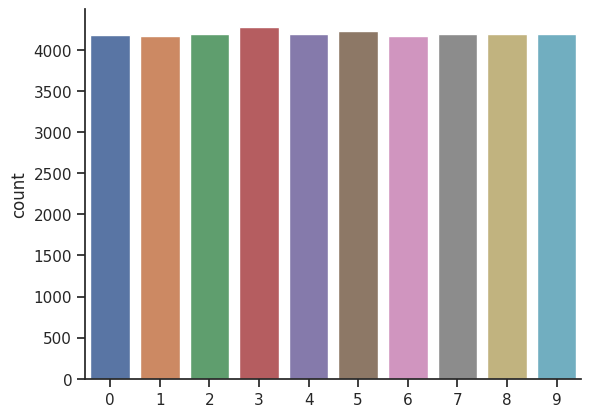

In [ ]:
# Plotting the distribution of each category (digit)
sb.countplot(x=y_train)
plt.show()

**Observation:**
- All images are in 32 x 32 size
- We have 60000 images in total
- 42000 of images will be used to train the model and 18000 for testing.
- The dataset is quite balanced, with each digit having almost the same number of images.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

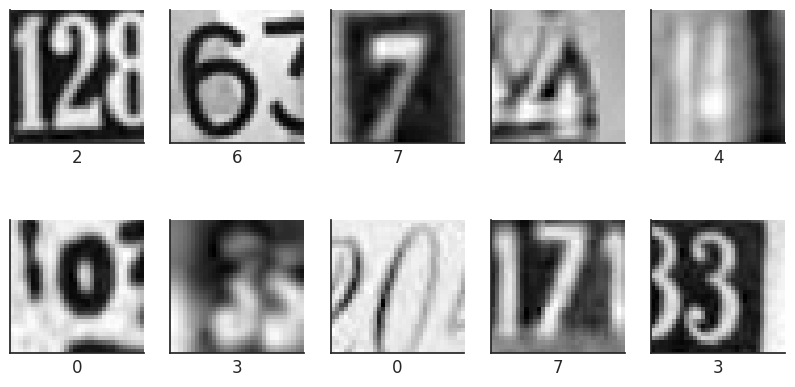

In [ ]:
# Declaring the number of classes
num_classes = 10
# Obtaing the unique classes from y_train
categories = np.unique(y_train)

# Defining the figure size to 10x5
fig = plt.figure(figsize=(10, 5))

for i in range(num_classes):
  plt.subplot(2, 5, i+1) # Adding subplots with 3 rows and 4 columns
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray')) # Plotting the image using cmap=gray
  plt.xlabel(y_train[i])

# Display the plot
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print(x_train[0])

print('\n\nThe shape of the first image:', x_train[0].shape)

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


The shape of the first image: (32, 32)


### **Normalize the train and the test data**

In [ ]:
# Normalizing the image pixels
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [ ]:
# Print the he array of pixels for the first image in the training dataset after applying normalization.
print(x_train_normalized[0])

[[0.12968785 0.11866706 0.10530196 ... 0.2801847  0.2283153  0.16860352]
 [0.09893451 0.10020902 0.1175549  ... 0.4432192  0.40534863 0.33056822]
 [0.10304902 0.08868118 0.15873058 ... 0.44432473 0.47754902 0.45263842]
 ...
 [0.11196157 0.14200786 0.17678471 ... 0.09465059 0.09840274 0.10219726]
 [0.15072627 0.10381687 0.09126157 ... 0.11023294 0.11556196 0.11790627]
 [0.19724864 0.10226392 0.0942702  ... 0.19477727 0.19942354 0.20799099]]


### **Print the shapes of Training and Test data**

In [ ]:
print(f'Shape of the training dataset {x_train_normalized.shape}')
print(f'Shape of the test dataset {x_test_normalized.shape}')

Shape of the training dataset (42000, 32, 32)
Shape of the test dataset (18000, 32, 32)


### **One-hot encode output**

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:
print(y_train[0])
print(y_train_encoded[0])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**
- Image pixel values range from 0 - 255.
- As can be seen above, appling normalization didn't change the size of the dataset. It only standardized the images to have values between 0 - 1.
- Since this is a 10-class classification problem, the output layer should have 10 neurons which will provide us with the probabilities of the input image belonging to each of those 10 classes. Therefore, we also need to create a one-hot encoded representation for the target classes.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
seed = 101
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Intializing a sequential model
model_ann = Sequential()

# Flatten the input to add dense convolutional layers on top of it
model_ann.add(Flatten(input_shape=(32, 32)))
# Adding firts hidden layer with 64 neurons
model_ann.add(Dense(64, activation='relu'))
# Adding second hidden layer with 32 neurons
model_ann.add(Dense(32, activation='relu'))
# Adding output layer
model_ann.add(Dense(num_classes, activation='softmax'))
# Declaring the optimizer
opt = Adam(learning_rate=0.001)
# Compiling the model
model_ann.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
# Print the summary of the model
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nr_epochs = 20
history_ann = model_ann.fit(
    x_train_normalized, y_train_encoded,
    epochs = nr_epochs,
    validation_split = 0.2,
    shuffle=True,
    batch_size=128,
    verbose=1
)

Epoch 1/20
263/263 [==============================] - 8s 7ms/step - loss: 2.2940 - accuracy: 0.1251 - val_loss: 2.2418 - val_accuracy: 0.1689
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1026 - accuracy: 0.2418 - val_loss: 1.9209 - val_accuracy: 0.3312
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.7932 - accuracy: 0.3808 - val_loss: 1.6971 - val_accuracy: 0.4158
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6347 - accuracy: 0.4386 - val_loss: 1.5773 - val_accuracy: 0.4624
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.5449 - accuracy: 0.4793 - val_loss: 1.5035 - val_accuracy: 0.4888
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.4830 - accuracy: 0.5036 - val_loss: 1.4678 - val_accuracy: 0.5110
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4308 - accuracy: 0.5246 - val_loss: 1.4341 - val_accuracy: 0.5245
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [ ]:
def plot_training_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.xticks(np.arange(0, nr_epochs, step=2))
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()

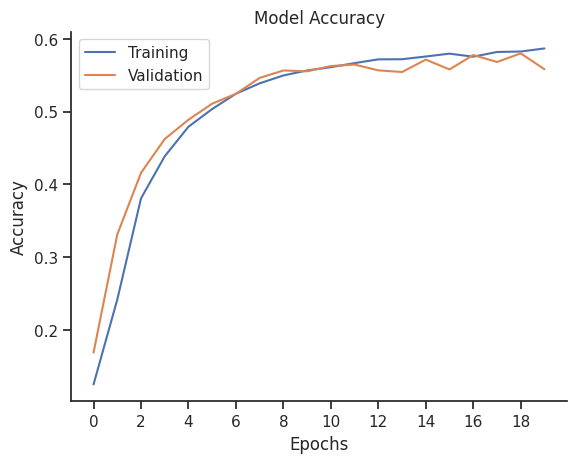

In [ ]:
plot_training_history(history_ann)

**Observations:** It seems that the generalization performance of the model is not sufficient. It could only achive 56% maximum accuracy. On the other hand there is no indication that model suffers from overfitting.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
backend.clear_session()
seed = 101
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**<a id='model_dnn_2'></a>

In [ ]:
model_ann_2 = Sequential()
model_ann_2.add(Flatten(input_shape=(32,32)))
model_ann_2.add(Dense(256, activation='relu'))
model_ann_2.add(Dropout(0.2))
model_ann_2.add(Dense(64, activation='relu'))
model_ann_2.add(Dense(64, activation='relu'))
model_ann_2.add(Dense(32, activation='relu'))
model_ann_2.add(BatchNormalization())
model_ann_2.add(Dense(num_classes, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model_ann_2.compile(optimizer = opt,
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])
model_ann_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
nr_epochs = 30
history_ann_2 = model_ann_2.fit(
    x_train_normalized, y_train_encoded,
    epochs = nr_epochs,
    validation_split = 0.2,
    shuffle = True,
    batch_size=128,
    verbose = 1
)

Epoch 1/30
263/263 [==============================] - 5s 9ms/step - loss: 2.3352 - accuracy: 0.1030 - val_loss: 2.3048 - val_accuracy: 0.1086
Epoch 2/30
263/263 [==============================] - 2s 7ms/step - loss: 2.2300 - accuracy: 0.1556 - val_loss: 2.1791 - val_accuracy: 0.2208
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 1.9139 - accuracy: 0.3024 - val_loss: 1.7471 - val_accuracy: 0.4567
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.7198 - accuracy: 0.3929 - val_loss: 1.4924 - val_accuracy: 0.5025
Epoch 5/30
263/263 [==============================] - 2s 6ms/step - loss: 1.6306 - accuracy: 0.4263 - val_loss: 1.4232 - val_accuracy: 0.5464
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.5770 - accuracy: 0.4442 - val_loss: 1.3762 - val_accuracy: 0.5481
Epoch 7/30
263/263 [==============================] - 1s 6ms/step - loss: 1.5525 - accuracy: 0.4529 - val_loss: 1.3311 - val_accuracy: 0.5694
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

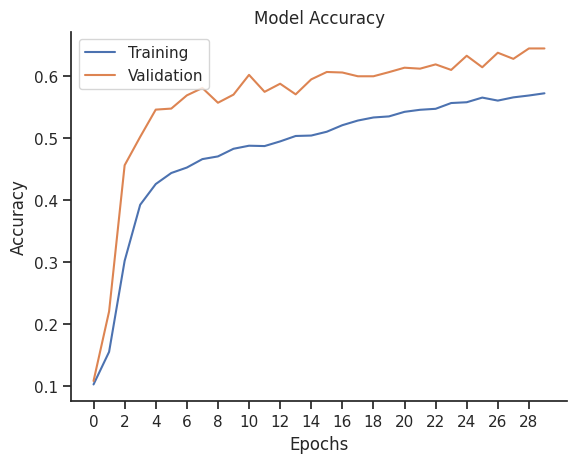

In [ ]:
plot_training_history(history_ann_2)

**Observations:** Validation accuracy increased very well and there is no indication of overfitting obviously. On the contrary, validation accuracy is better than the training accuracy which might an indication for that the model hasn't complete the training yet. And the plot shows an inclining trend. Either we can increase the number of epochs and let it overfit upto a certain level, or we can increase the step size (`learning_rate`) and let the gradients move a little bit faster.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
accuracy = model_ann_2.evaluate(x_test_normalized, y_test_encoded, verbose=2)

563/563 - 1s - loss: 1.0878 - accuracy: 0.6544 - 1s/epoch - 2ms/step


In [ ]:
y_pred = model_ann_2.predict(x_test_normalized)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_pred_arg = np.argmax(y_pred, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
def model_performance(y_pred, y_test):
  '''
    This function takes the predict values and test values and prints
    the classification report along with the confusion matrix plot.
  '''
  print(classification_report(y_test, y_pred))
  print('\n')

  # Calculate the confusion matrix
  cm = confusion_matrix(y_pred, y_test)
  # Plot the confution matrix (cm)
  plt.figure(figsize=(10, 8))
  sb.heatmap(cm, annot=True, fmt='.0f')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

              precision    recall  f1-score   support

           0       0.55      0.74      0.63      1814
           1       0.57      0.77      0.66      1828
           2       0.65      0.61      0.63      1803
           3       0.65      0.61      0.63      1719
           4       0.79      0.72      0.76      1812
           5       0.71      0.58      0.64      1768
           6       0.69      0.64      0.67      1832
           7       0.67      0.73      0.70      1808
           8       0.64      0.59      0.62      1812
           9       0.73      0.53      0.62      1804

    accuracy                           0.65     18000
   macro avg       0.67      0.65      0.65     18000
weighted avg       0.67      0.65      0.65     18000





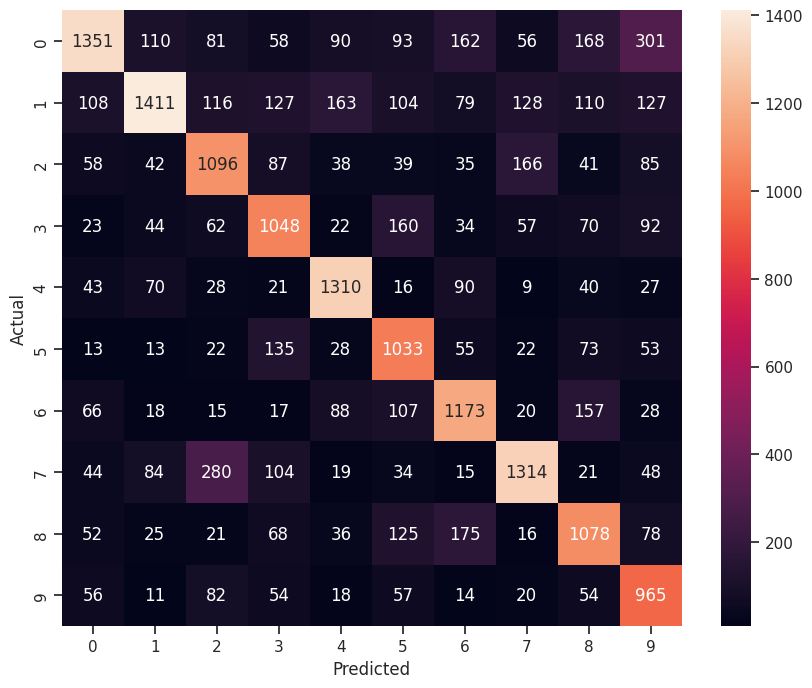

In [ ]:
model_performance(y_pred_arg, y_test)

**Final Observations:**
- The 2nd model generates 66% accuracy on the test data which is almost the same as the accuracy on the validation data.
- The recall has a high range which implies that the model is good at identifying some objects while poor at identifying some other objects. For example, the model can identify more than 75% of digit 4 but can identify only almost 59% of digit 5.
- The model is majorly confused between digit 2 and digit 7.

### **Visualizing the predicted images randomly**

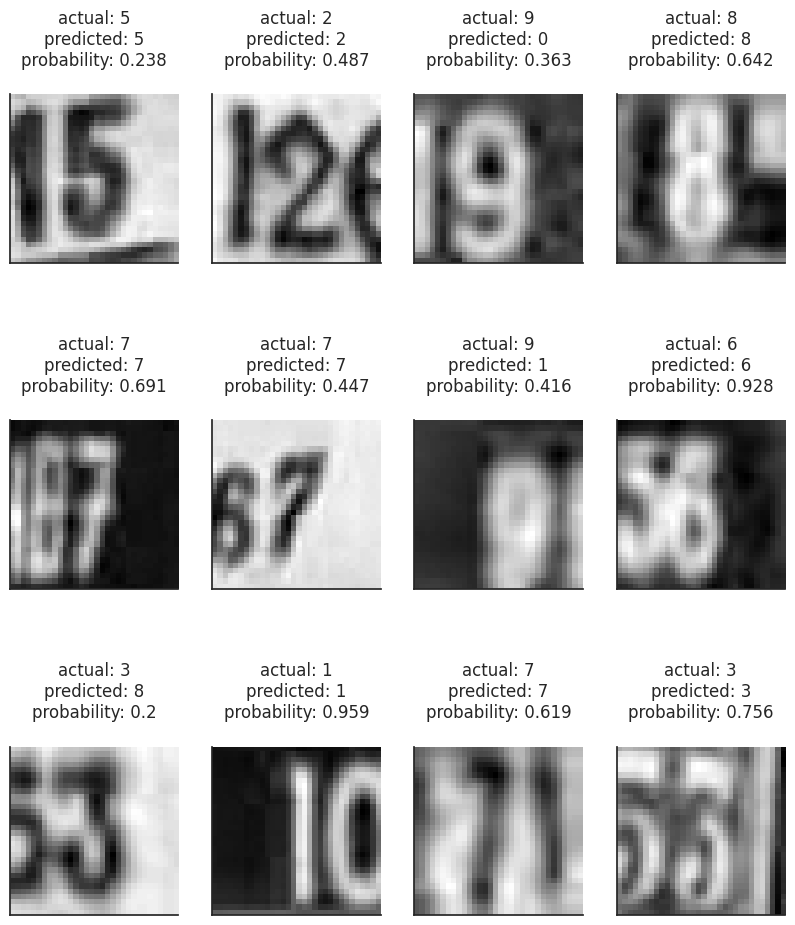

In [ ]:
# Lets plot random images from the test set and how they were intrepreted by the model
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 12))
# Calculating the probability of the predicted class
y_pred_max_probas = np.max(y_pred, axis = 1)

for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_test))
    # Adding subplots with 3 rows and 4 columns
    plt.subplot(rows, cols, i*rows+j+1)
    plt.imshow(x_test[random_index], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pred_label = y_pred_arg[random_index]
    pred_proba = y_pred_max_probas[random_index]
    true_label = y_test[random_index]
    plt.title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))

plt.show()

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# read the data
images = h5py.File(path + 'SVHN_single_grey1.h5','r+')

x_train = images['X_train'][:]
y_train = images['y_train'][:]
x_test = images['X_test'][:]
y_test = images['y_test'][:]

Check the number of images in the training and the testing dataset.

In [ ]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (42000, 32, 32)
y_train (42000,)
x_test (18000, 32, 32)
y_test (18000,)


**Observation:** There 42K training images and 18K test images which makes it 60K in total.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print(f'The shape of the first image:{x_train[0].shape}\n\n')

print(x_train[0])

The shape of the first image:(32, 32)


[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshaping the train set
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
# Reshaping the test set
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

Normalize inputs from 0-255 to 0-1

In [ ]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

Print New shape of Training and Test

In [ ]:
print(f'Shape of the training dataset {x_train_normalized.shape}')
print(f'Shape of the test dataset {x_test_normalized.shape}')

Shape of the training dataset (42000, 32, 32, 1)
Shape of the test dataset (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

**Observation:**
- Image pixel values range from 0 - 255.
- As can be seen above, appling normalization didn't change the size of the dataset. It only standardized the images to have values between 0 - 1.
- In Keras, the **input must be 4-dimensional** to pass them to a CNN model. Since we have grayscale images, we **reshaped** the input features to specifically mention that we have only 1 channel, i.e., gray.
- Since this is a 10-class classification problem, the output layer should have 10 neurons which will provide us with the probabilities of the input image belonging to each of those 10 classes. Therefore, we also need to create a one-hot encoded representation for the target classes.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
seed = 101
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
model_cnn_1 = Sequential()
# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
# The input_shape denotes input dimension of SVHN images
model_cnn_1.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
# Adding LeakyRelu activation function with a negative slope of 0.1
model_cnn_1.add(LeakyReLU(0.1))
model_cnn_1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model_cnn_1.add(LeakyReLU(0.1))
# Adding max pooling to reduce the size of the output of second convolutional layer
model_cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_cnn_1.add(Flatten())
# Adding a fully connected dense layer with 32 neurons
model_cnn_1.add(Dense(32))
model_cnn_1.add(LeakyReLU(0.1))
# Adding the output layer with 10 neurons and 'softmax' activation function (for a multi-class classification problem)
model_cnn_1.add(Dense(10, activation='softmax'))
# Printing the summary of the model
model_cnn_1.summary()

model_cnn_1.compile(
    loss = 'categorical_crossentropy',
    # Using Adam optimizer with 0.001 which is the default value
    optimizer = Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
nr_epochs = 20
history_cnn_1 = model_cnn_1.fit(
    x_train_normalized, y_train_encoded,
    epochs = nr_epochs,
    validation_split = 0.2,
    batch_size = 32,
    verbose = 1
)

Epoch 1/20
1050/1050 [==============================] - 12s 5ms/step - loss: 1.0143 - accuracy: 0.6780 - val_loss: 0.6345 - val_accuracy: 0.8162
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.5364 - accuracy: 0.8445 - val_loss: 0.5248 - val_accuracy: 0.8531
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4480 - accuracy: 0.8697 - val_loss: 0.5041 - val_accuracy: 0.8555
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3916 - accuracy: 0.8834 - val_loss: 0.4597 - val_accuracy: 0.8721
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3441 - accuracy: 0.8974 - val_loss: 0.4812 - val_accuracy: 0.8631
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3051 - accuracy: 0.9069 - val_loss: 0.4494 - val_accuracy: 0.8756
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2734 - accuracy: 0.9166 - val_loss: 0.4612 - val_accuracy

### **Plot the Training and Validation Accuracies and Write your observations.**

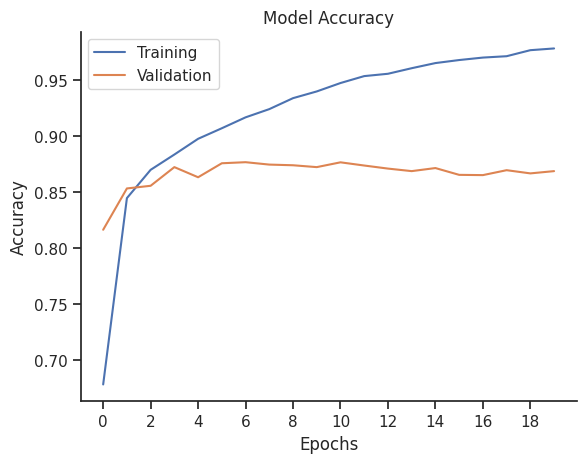

In [ ]:
plot_training_history(history_cnn_1)

In [ ]:
accuracy = model_cnn_1.evaluate(x_test_normalized, y_test_encoded, verbose=2)

563/563 - 1s - loss: 0.8138 - accuracy: 0.8708 - 1s/epoch - 3ms/step


**Observations:** In the [second DNN model](#model_dnn_2) we achieved almost 69% accuracy with 285,482 trainable parameters. When you compare it with the current CNN model, we have 267,306 trainable parameters, which means that we have less complex model, we achieved almost 87% accuracy score that is way better than the DNN model.

However, it can easily be noticed that the current CNN model suffers from overfitting.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
backend.clear_session()
seed = 101
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
model_cnn_2 = Sequential()
model_cnn_2.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
model_cnn_2.add(LeakyReLU(0.1))
model_cnn_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model_cnn_2.add(LeakyReLU(0.1))
model_cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_2.add(BatchNormalization())
model_cnn_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model_cnn_2.add(LeakyReLU(0.1))
model_cnn_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model_cnn_2.add(LeakyReLU(0.1))
model_cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_2.add(BatchNormalization())
model_cnn_2.add(Flatten())
model_cnn_2.add(Dense(32))
model_cnn_2.add(LeakyReLU(0.1))
model_cnn_2.add(Dropout(0.5))
model_cnn_2.add(Dense(10, activation='softmax'))
model_cnn_2.summary()

model_cnn_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
nr_epochs = 30
history_cnn_2 = model_cnn_2.fit(
    x_train_normalized, y_train_encoded,
    epochs = nr_epochs,
    validation_split = 0.2,
    batch_size = 128,
    verbose = 1
)

Epoch 1/30
263/263 [==============================] - 6s 13ms/step - loss: 1.3589 - accuracy: 0.5432 - val_loss: 1.9774 - val_accuracy: 0.4895
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6436 - accuracy: 0.7993 - val_loss: 0.5691 - val_accuracy: 0.8420
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 0.5304 - accuracy: 0.8362 - val_loss: 0.4538 - val_accuracy: 0.8669
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4665 - accuracy: 0.8579 - val_loss: 0.4265 - val_accuracy: 0.8756
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4328 - accuracy: 0.8651 - val_loss: 0.3869 - val_accuracy: 0.8888
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3972 - accuracy: 0.8754 - val_loss: 0.3705 - val_accuracy: 0.8963
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 0.3647 - accuracy: 0.8886 - val_loss: 0.3625 - val_accuracy: 0.9012


### **Plot the Training and Validation accuracies and write your observations.**

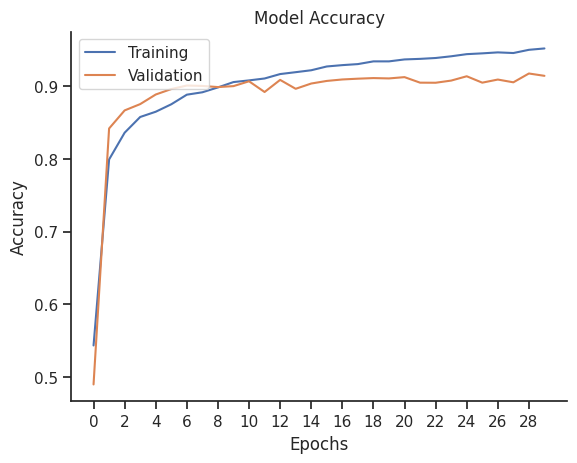

In [ ]:
plot_training_history(history_cnn_2)

In [ ]:
accuracy = model_cnn_2.evaluate(x_test_normalized, y_test_encoded, verbose=2)

563/563 - 1s - loss: 0.4309 - accuracy: 0.9142 - 1s/epoch - 3ms/step


**Observations:** The overal accuracy score of the current model is slightly better than the previous CNN model. It looks like adding extra 3 convolutional layers worked well. Also, adding regularization layers such as `BatchNormalization` and `Dropout` decreased the overfitting problem of the previous model considerably.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
y_pred = model_cnn_2.predict(x_test_normalized)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1814
           1       0.90      0.90      0.90      1828
           2       0.92      0.93      0.93      1803
           3       0.87      0.90      0.89      1719
           4       0.93      0.93      0.93      1812
           5       0.89      0.93      0.91      1768
           6       0.94      0.89      0.91      1832
           7       0.91      0.95      0.93      1808
           8       0.94      0.87      0.90      1812
           9       0.93      0.89      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000





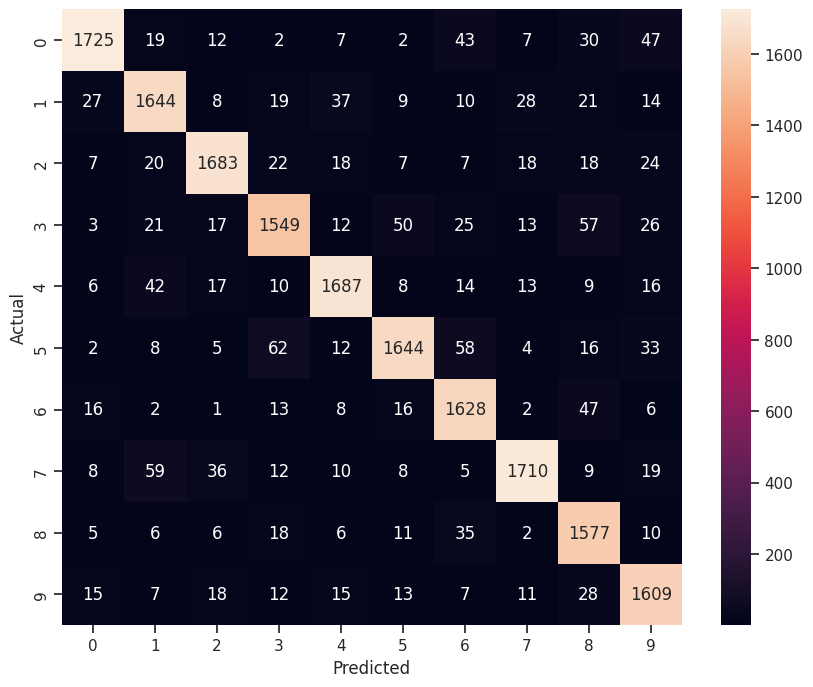

In [ ]:
y_pred_arg = np.argmax(y_pred, axis=1)
model_performance(y_pred_arg, y_test)

### **Visualizing the predicted images randomly**

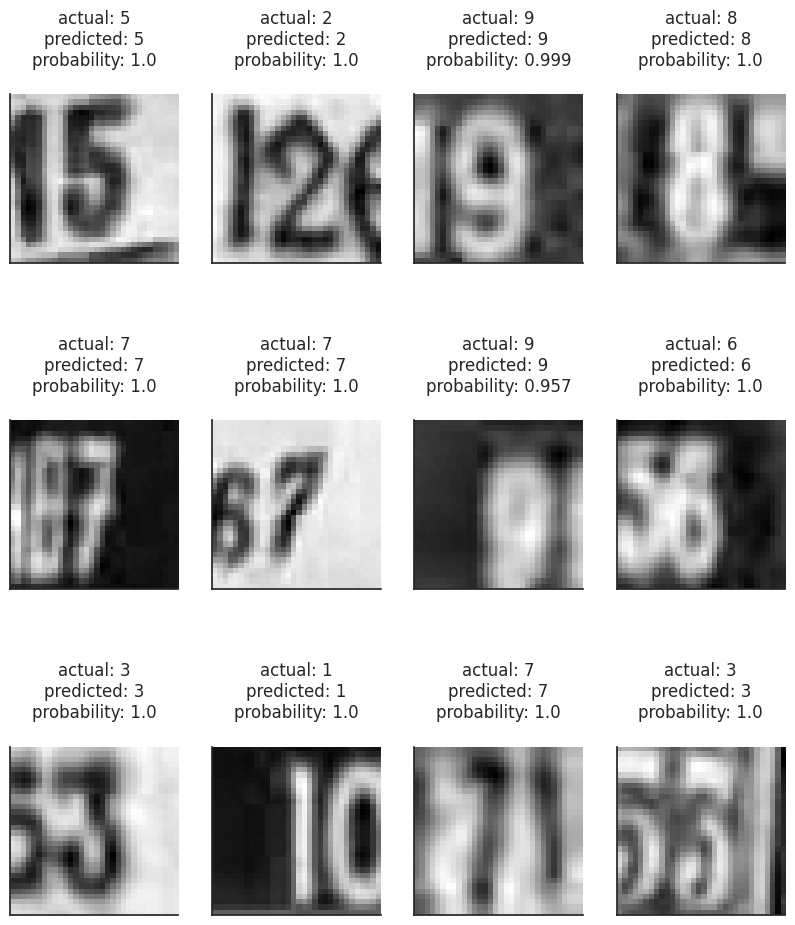

In [ ]:
# Lets plot random images from the test set and how they were intrepreted by the model
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 12))
# Calculating the probability of the predicted class
y_pred_max_probas = np.max(y_pred, axis = 1)

for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_test))
    # Adding subplots with 3 rows and 4 columns
    plt.subplot(rows, cols, i*rows+j+1)
    plt.imshow(x_test[random_index], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pred_label = y_pred_arg[random_index]
    pred_proba = y_pred_max_probas[random_index]
    true_label = y_test[random_index]
    plt.title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))

plt.show()

### **Write your final observations on the performance of the model on the test data.**

- The model is giving about 91% accuracy on the test data which is comparable to the accuracy of the validation data. This implies that the model is giving a good generalized performance.
- The recall has not a high range which implies that the model is good at identifying almost all digits.
- The highest precision is for digits 6 and 8 which implies that the model can distinguish these digits from other objects.
- The lowest precision values are for digit 3 and digit 5 which can easily be noticed on the confusion matrix too.


**Final Observations:** In this project we tried to create a deep learning model which would allow us to recognize digits from the housing number images. To achieve this goal we used the 48K of the total 60K images for training of the model and remaining 12K to check the performance of the model. We tried to solve this problem first by using densely connected models (DNN). We developed 2 different models. The latter model was more complex than the first one relatively. However, the overall performance of these models was poor when you compare it to the convolutional neural network (CNN) models. The first CNN model performed better than DNN models however it suffered from overfitting. We solved this problem by adding some regularization methods such as `BatchNormalization` and `Dropout` layers. Additionaly, we add more convolutional layers so the model could be better on feature extraction.

There is still plenty of scope for improvement and you can try out tuning different hyperparameters to improve the model performance.

## **Bonus: Visualizing the CNN model**

[`visualkeras` library](https://pypi.org/project/visualkeras/) allows us to visualize the deep learning models.

In [ ]:
# Comment below command if you have already installed visualkeras library
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 8.6 MB/s eta 0:00:00


In [ ]:
import visualkeras

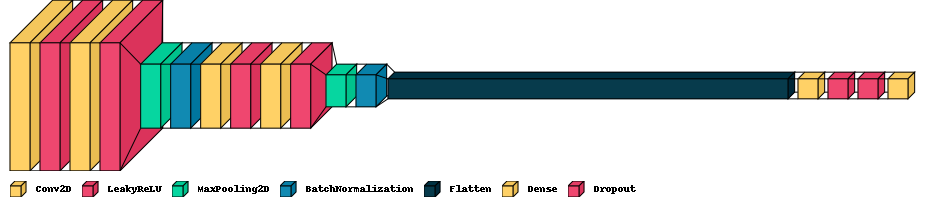

In [ ]:
visualkeras.layered_view(model_cnn_2, legend=True)